In [1]:
from fenics import *

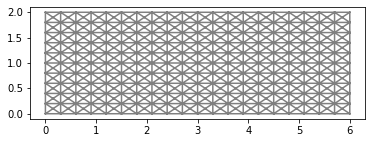

In [2]:
# Lets generate a rectangular mesh
mesh = RectangleMesh(Point(0.0,0.0), Point(6.0, 2.0), 20, 10, "crossed")
plot(mesh)

In [3]:
# Now lets define the boundary conditions, 
## The left end is zero displacement boundary
### This function does exactly that
### It defined a region in the x direction near the point x = 0, with a tolerance level
tolerance = 1*(10**(-4)) #1e-4

def left(x, on_boundary):
    return near(x[0], 0., tolerance)

In [23]:
# Lets define the body forces (per unit volume)
f = Constant((0.0, -1e2)) # Since it is vector field and it has no x component

In [24]:
# Lets form a test function p, before that lets form a function space
# We will use a Vector Function space over the domain mesh, since p is a vector field
V = VectorFunctionSpace(mesh, "Lagrange", degree=2)

## Setting up the boundary condition using the DirichletBc function, 
### Tell the function space , point where the BC to be applied and the type of BC
bc = DirichletBC(V, Constant((0.0, 0.0)), left)

In [25]:
# Lets define our test function and trial function
p = TestFunction(V)
v = TrialFunction(V)

## Our work is not done yet, we want the grad of p and sigma, which is the stress tensor. 

### Lets calculate the grad of p, which is symmetric tensor, since p is a vector field

### We define a modular function for that, which takes vector field and gives out symmetric 
### gradient tensor.
def gradient(v):
    # Symmetrical gradient tensor of a vector field, just like the elastic strain
    return sym(grad(v))

In [26]:
# We now need to define the stress tensor, 

## sigma = lambda*tr(strain_tensor) + 2*mu*strain_tensor

## Here lambda and mu are Lame's Constants
### We need young's modulus and poisson's ratio to solve that. 
Y = 10**5
poisson = 0.3

lamda, mu = Y*poisson/(1+poisson)/(1-2*poisson), (Y*0.5)/(1+poisson)

In [27]:
# Define a function sigma
def sigma(v):
    # tr(v) is an inbuilt function which computes the trace
    # Identity is an inbuilt function, which takes an argument and returns tensor of that order
    return lamda*tr(gradient(v))*Identity(2) + 2.0*mu*gradient(v)

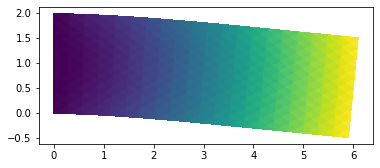

In [28]:
## We are done with the basics, lets setup the variational form
a = inner(sigma(v), gradient(p))*dx
l = inner(f, p)*dx

# Lets solve it now, but before we go ahead
## We need to tell what it is exactly which we aer solving for, which is the displacement function u

u = Function(V, name="Displacement")

solve(a==l, u, bc)

## We are done solving, lets plot it 
plot(u, mode="displacement")